# **Correlation Example** -- Income

In this example, you will look at data about people's income -- in adddition to their age, gender, and education.  **You will use correlation to understand the strength of the relationship between variables.**

### Import Python Libraries

Python libraries help to extend the Python programming language -- or to help make our tasks easier.  There are *lots* of Python libraries and they do *lots* of different things.  For our purposes, we will import **"pandas"** to load and manipulate data and **"seaborn"** to visualize our data.

In [1]:
# Import the appropriate Python libraries.
import pandas as pd
import seaborn as sns

### Load Data (Option #1)

One of the biggest challenges that people run into with Google Colab is loading data.  For simplicity, our dataset from this example has already been stored in the cloud on Github.  (We also used a URL shortener to make it easier to type.)  To see what this file looks like, you can copy the following link (http://bit.ly/income-file) and paste into your browser window.  (You could also load the data from your own computer.)

In [2]:
# Load the CSV file into a dataframe.
df_income = pd.read_csv("http://bit.ly/income-file")

### Load Data (Option #2)

You can also load data into Google Colab from your own computer.  To do so, once you have the file downloaded from [here](https://drive.google.com/file/d/1oN_wqW0iJuGGcu_xFsfZ6Q9SexsUZvjY/view?usp=sharing), (1) run the next cell to select where the file is located on your hard drive and (2) run the cell after to load the CSV file into a dataframe.  (Ensure that the name of the file is spelled correctly in the second cell below.)

In [5]:
# Select where data file is located on our local drive.
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


In [8]:
# Load the CSV file into a dataframe.
import io
df_income = pd.read_csv(io.BytesIO(uploaded['income.csv']))

### Explore the Data

Before we go farther, we should explore our dataset to better understand it.  This will include previewing the columns and their datatypes, generating descriptive statistics, and basic graphing.

In [10]:
# List all fields and their data types.
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         1500 non-null   int64
 1   Income     1500 non-null   int64
 2   Age        1500 non-null   int64
 3   Education  1500 non-null   int64
 4   Gender     1500 non-null   int64
dtypes: int64(5)
memory usage: 58.7 KB


In [11]:
# Preview the first few records of data.
df_income.head()

,ID,Income,Age,Education,Gender
0,1,113,69,12,1
1,2,91,52,18,0
2,3,121,65,14,0
3,4,81,58,12,0
4,5,68,31,16,1


In [12]:
# Generate descriptive stats.
df_income.describe()

,ID,Income,Age,Education,Gender
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,75.986000,43.582000,14.681333,0.490000
std,433.157015,20.005215,15.169466,2.693812,0.500067
min,1.000000,14.000000,18.000000,10.000000,0.000000
25%,375.750000,62.000000,30.000000,12.000000,0.000000
50%,750.500000,76.000000,44.000000,15.000000,0.000000
75%,1125.250000,91.000000,57.000000,16.000000,1.000000
max,1500.000000,134.000000,70.000000,20.000000,1.000000


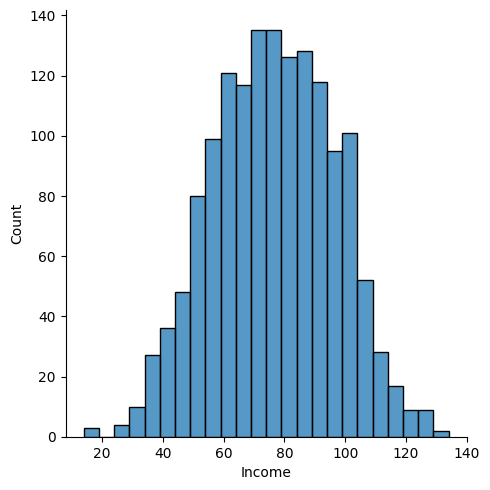

In [13]:
# Show the distribution of income.
sns.displot(df_income, x = "Income");

### Calculate Correlation

We will now calculate correlation coefficients using the **"corr"** function.  These measure the strength of relationship between variables.  (We do this before performing regression.)  As these values approach 0, there is little or no relationship.  When they approach -1 or 1, the relationship becomes stronger.

In [14]:
# Show the correlation (r) betwen variables.
df_income.corr()

,ID,Income,Age,Education,Gender
ID,1.000000,-0.038846,-0.037770,-0.074147,0.005246
Income,-0.038846,1.000000,0.761486,0.256634,-0.045060
Age,-0.037770,0.761486,1.000000,0.026254,-0.027242
Education,-0.074147,0.256634,0.026254,1.000000,-0.004843
Gender,0.005246,-0.045060,-0.027242,-0.004843,1.000000


### Graph Correlation

Now, we'll use seaborn to generate graphs that will show correlation between variables.

<Axes: >

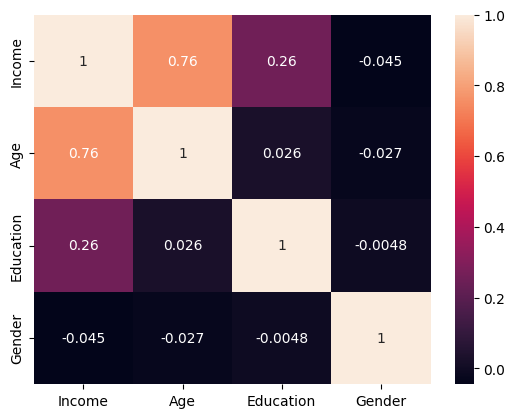

In [15]:
# Show the relationships on a heatmap.  (We omit the ID column.)
corr = df_income.iloc[:, 1:5].corr()
sns.heatmap(corr, annot = True)

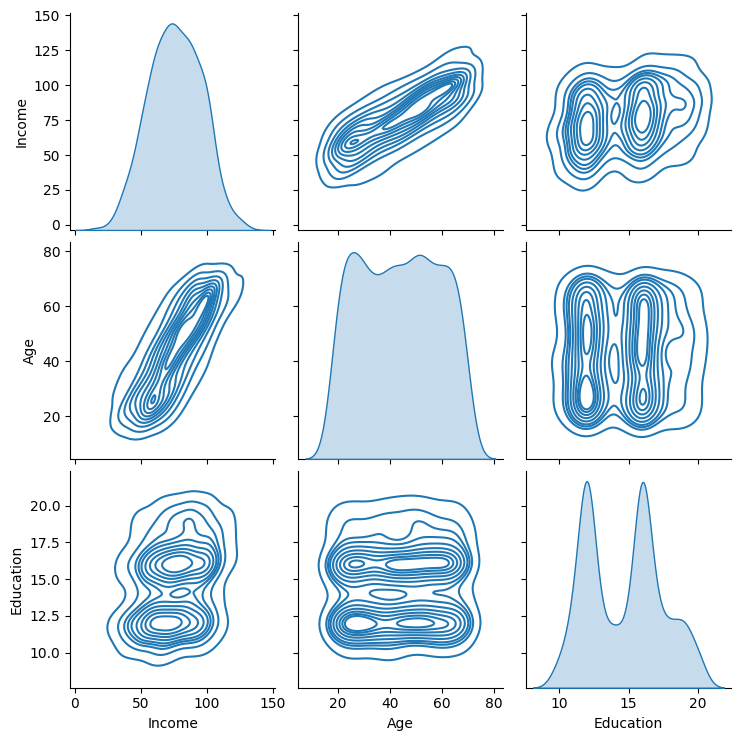

In [16]:
# Show the relationships on a pairplot. (We omit the ID and gender columns.)
# sns.pairplot(df_income.iloc[:, 1:4]);  # This results in too many data points.
sns.pairplot(df_income.iloc[:, 1: 4], kind = "kde");